##### Chap 1.4.5 Morphological Transformations

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

##### Erosion

In [6]:
img = cv2.imread('j.png',0)
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel, iterations = 1)

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

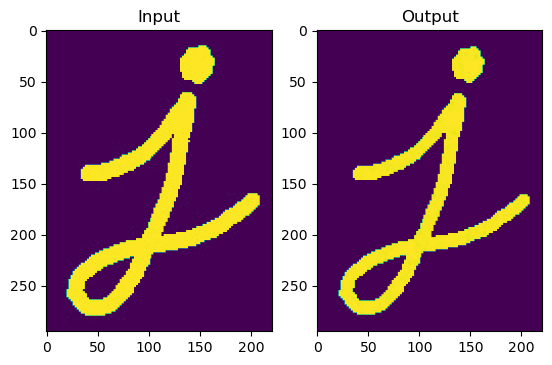

In [7]:
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(erosion),plt.title('Output')

##### Translate

In [7]:
img = cv2.imread('Hero.png')
rows,cols = img.shape[:2]
M = np.float32([[1, 0, 100],[0, 1, 50]])
dst = cv2.warpAffine(img,M,(cols,rows))

In [8]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Rotate

In [15]:
img = cv2.imread('Hero.png')
rows,cols = img.shape[:2]
M = cv2.getRotationMatrix2D((cols/4,rows/4),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [16]:
cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### Affine Transformation

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

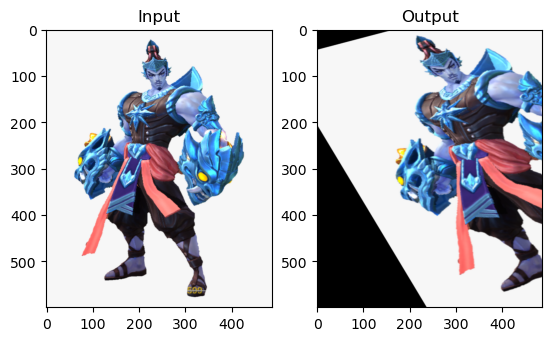

In [17]:
img = cv2.imread('Hero.png')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')

##### Perspective Transformation

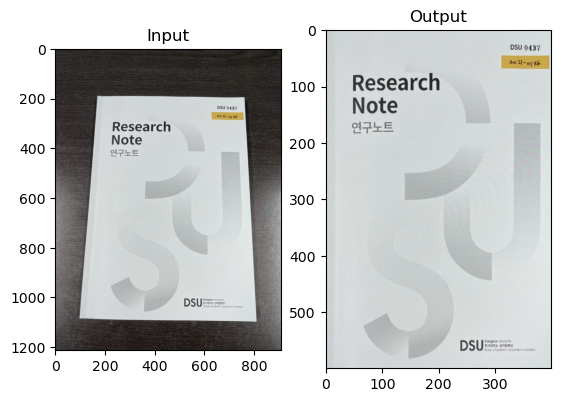

In [21]:
img = cv2.imread('IMG_6504.JPG')
rows,cols,ch = img.shape
pts1 = np.float32([[170,190],[760,196],[808,1096],[100,1080]])
pts2 = np.float32([[0,0],[400,0],[400,600],[0,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,600))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

In [ ]:
img = cv2.imread('IMG_6504.JPG')
rows,cols,ch = img.shape
pts1 = np.float32([[170,190],[760,196],[808,1096],[100,1080]])
pts2 = np.float32([[0,0],[400,0],[400,600],[0,600]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(400,600))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

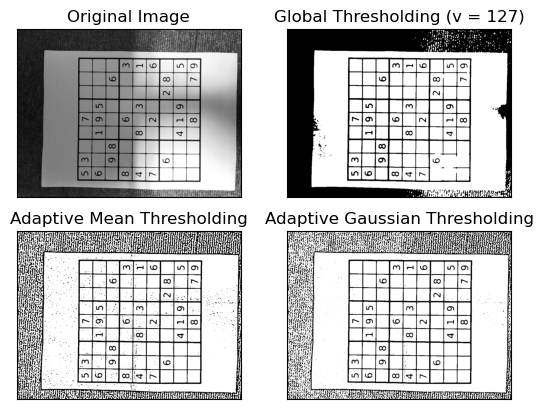

In [6]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [10]:
img = cv2.imread('sIMG_2168.jpg',0)
#img = cv2.medianBlur(img,5)

In [11]:
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

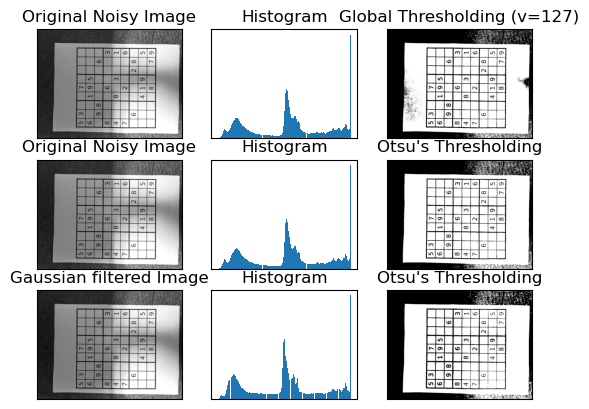

In [12]:
# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
# Load two images
img1 = cv2.imread('Hero.png')
img2 = cv2.imread('OpenCV.png')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

In [6]:
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

In [7]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
mask_inv

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)


In [10]:
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst


In [11]:
cv2.imshow('res',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
img1 = cv2.imread('Hero.png')
e1 = cv2.getTickCount()
img1 = cv2.medianBlur(img1,3)
e2 = cv2.getTickCount()
t = (e2 - e1)/cv2.getTickFrequency()
print(t)

0.4448523


In [14]:
import cv2
import numpy as np

In [24]:
img1 = cv2.imread('Hero.png')
def nothing(x):
    pass

In [26]:
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('median','image',0,10,nothing)
mimg1 = img1
while(1):
    cv2.imshow('image',mimg1)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    m = cv2.getTrackbarPos('median','image')
    mimg1 = cv2.medianBlur(img1,2*m+1)

cv2.destroyAllWindows()

In [27]:
img1 = cv2.imread('Hero.png')
img2 = cv2.imread('OpenCV.png')

In [29]:
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('add','image',0,100,nothing)
dst = cv2.addWeighted(img1,1.0,img2,0.0,0)
while(1):
    cv2.imshow('image',dst)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    w = cv2.getTrackbarPos('add','image')
    dst = cv2.addWeighted(img1,1-w/100.,img2,w/100.,0)

cv2.destroyAllWindows()

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'image' in function 'cvGetTrackbarPos'


In [2]:
drawing = False # true if mouse is pressed
mode = True 
ix,iy = -1,-1
font = cv2.FONT_HERSHEY_SIMPLEX

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        cv2.putText(img,'Mouse Position ('+str(ix)+","+str(iy)+")",(10,50), font, 0.7,(255,255,255),1,cv2.LINE_AA)
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)

In [3]:
img = cv2.imread('Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg')
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()